**Description**: The dataset consists of feature vectors belong to 12330 sessions and the data were constituted so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Moreover, among the 12330 sessions in the dataset, 84.5% (10422) were negative class samples that did not end with shopping and the rest (1908) were positive class samples ending with shopping.

Additional Variable Information: The dataset comprises 10 numerical and 8 categorical attributes, with the 'Revenue' attribute serving as the class label. Metrics such as "Administrative," "Administrative Duration," "Informational," "Informational Duration," "Product Related," and "Product Related Duration" quantify the number of pages visited and the time spent on different page categories during a session. These values are derived from the URL information of the visited pages, dynamically updated in real-time as users navigate through the site. The features "Bounce Rate," "Exit Rate," and "Page Value" correspond to metrics measured by "Google Analytics" for each page in the e-commerce site. "Bounce Rate" indicates the percentage of visitors who enter a page and leave without triggering additional requests to the analytics server. "Exit Rate" calculates the percentage of pageviews that were the last in a session. Meanwhile, "Page Value" represents the average value of a page visited before completing an e-commerce transaction. The "Special Day" feature gauges the proximity of site visits to specific occasions (e.g., Mother’s Day, Valentine's Day), where transactions are more likely to occur. This attribute's value considers e-commerce dynamics, such as the duration between the order date and delivery date. For instance, around Valentine’s Day, the value is nonzero between February 2 and February 12, zero before and after unless close to another special day, reaching a maximum of 1 on February 8. Additionally, the dataset includes information on the operating system, browser, region, traffic type, visitor type (returning or new), a Boolean indicator for weekend visits, and the month of the year.



In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8155..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjhhmilib
  JVM stdout: /tmp/tmpjhhmilib/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjhhmilib/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8155
Connecting to H2O server at http://127.0.0.1:8155 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_9cbbi0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = "https://github.com/shwetackhade/Data-Science-Engineering-Methods-and-Tools/blob/main/online_shoppers_intention.csv?raw=true"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://github.com/shwetackhade/Data-Science-Engineering-Methods-and-Tools/blob/main/online_shoppers_intention.csv?raw=true')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
dff.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
dff.isnull()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.types

{'Administrative': 'int',
 'Administrative_Duration': 'real',
 'Informational': 'int',
 'Informational_Duration': 'real',
 'ProductRelated': 'int',
 'ProductRelated_Duration': 'real',
 'BounceRates': 'real',
 'ExitRates': 'real',
 'PageValues': 'real',
 'SpecialDay': 'real',
 'Month': 'enum',
 'OperatingSystems': 'int',
 'Browser': 'int',
 'Region': 'int',
 'TrafficType': 'int',
 'VisitorType': 'enum',
 'Weekend': 'enum',
 'Revenue': 'enum'}

In [ ]:
dff.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
dff['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
dff.shape

(12330, 18)

In [ ]:
dff.Revenue = dff.Revenue.astype(int)
dff.Weekend = dff.Weekend.astype(int)
dff.VisitorType = dff.VisitorType.replace(
    {'Returning_Visitor': '0',
    'Other': '2',
    'New_Visitor': '1',
    }).astype(int)
dff.Month = dff.Month.replace(
    {'Jan': '1',
    'Feb': '2',
    'Mar': '3',
    'Apr': '4',
    'May': '5',
    'June': '6',
    'Jul': '7',
    'Aug': '8',
    'Sep': '9',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12',
    }).astype(int)

In [ ]:
dff.Month

0         2
1         2
2         2
3         2
4         2
         ..
12325    12
12326    11
12327    11
12328    11
12329    11
Name: Month, Length: 12330, dtype: int64

In [ ]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(9870, 18)
(2460, 18)


In [ ]:
X=df.columns
print(X)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [ ]:
y_numeric ='Revenue'
X.remove(y_numeric)
print(X)


['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


**H20 AutoML Execution**

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)


In [ ]:
aml.train(x=X,y=y_numeric,training_frame=df_train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/12
# GBM base models (used / total),5/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


**Interpreting the above results**



In [ ]:
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_2_AutoML_1_20240220_43444     0.93204    0.226004  0.745533                0.171574  0.263509  0.069437
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_43444  0.931915   0.226159  0.743747                0.182274  0.263587  0.0694782
StackedEnsemble_AllModels_1_AutoML_1_20240220_43444     0.931663   0.226483  0.744601                0.186577  0.26352   0.0694427
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_43444  0.931108   0.22735   0.741269                0.173529  0.264146  0.0697729
GBM_1_AutoML_1_20240220_43444                           0.931008   0.228651  0.740462                0.179676  0.264608  0.0700173
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_43444  0.931008   0.228655  0.740421                0.177893  0.264534  0.069978
GBM_2_AutoML_1_20240220_43444                           0.929834   0.231377  0.737776

**Analysing the Analysing relation between all variables**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Encode categorical variables
#dff_encoded = pd.get_dummies(dff, columns=['Month', 'VisitorType'], drop_first=True)

# Select relevant columns, ensuring all are numeric
Multic = dff[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,Administrative,2.797351
1,Administrative_Duration,2.043325
2,Informational,2.115815
3,Informational_Duration,1.778757
4,ProductRelated,6.515557
5,ProductRelated_Duration,6.017431
6,BounceRates,6.786373
7,ExitRates,9.796689
8,PageValues,1.475000
9,SpecialDay,1.118985


In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Revenue ~ Administrative + Administrative_Duration + Informational + Informational_Duration + ProductRelated + ProductRelated_Duration + BounceRates + ExitRates + PageValues + SpecialDay + Month + OperatingSystems + Browser + Region + TrafficType + VisitorType + Weekend', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     278.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        04:38:32   Log-Likelihood:                -2950.3
No. Observations:               12330   AIC:                             5937.
Df Residuals:                   12312   BIC:                             6070.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0806      0.012      6.882      0.000       0.058       0.104
Administrative              0.0017      0.001      1.498      0.134      -0.001       0.004
Administrative_Duration -1.746e-05   2.04e-05     -0.856      0.392   -5.74e-05    2.25e-05
Informational               0.0031      0.003      1.040      0.298      -0.003       0.009
Informational_Duration    1.06e-05   2.55e-05      0.416      0.678   -3.94e-05    6.06e-05
ProductRelated              0.0003      0.000      2.606      0.009    8.49e-05       0.001
ProductRelated_Duration  1.021e-05   3.01e-06      3.388      0.001     4.3e-06    1.61e-05
BounceRates                 0.5179      0.144      3.585      0.000       0.235       0.801
ExitRates                  -1.0743      0.152     -7.076      0.000      -1.372      -0.777
PageValues                  0.0089      0.000     58.356      0.000       0.009       0.009
SpecialDay                 -0.0352      0.015     -2.412      0.016      -0.064      -0.007
Month                       0.0067      0.001      7.777      0.000       0.005       0.008
OperatingSystems           -0.0117      0.003     -3.690      0.000      -0.018      -0.006
Browser                     0.0018      0.002      1.053      0.292      -0.002       0.005
Region                     -0.0025      0.001     -2.174      0.030      -0.005      -0.000
TrafficType              3.079e-05      0.001      0.043      0.965      -0.001       0.001
VisitorType                 0.0337      0.008      4.315      0.000       0.018       0.049
Weekend                     0.0120      0.007      1.819      0.069      -0.001       0.025
==============================================================================
Omnibus:                     3179.362   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10654.104
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       6.750   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dff.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.096713,-0.006347,-0.025035,-0.005487,-0.033561,0.016680,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.057885,-0.007343,-0.015392,-0.005561,-0.014376,0.019120,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.063500,-0.009527,-0.038235,-0.029169,-0.034491,-0.058211,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.044354,-0.009579,-0.019285,-0.027144,-0.024675,-0.045372,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.156022,0.004290,-0.013146,-0.038122,-0.043064,-0.127916,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.137520,0.002976,-0.007380,-0.033091,-0.036377,-0.118273,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.066562,0.023823,-0.015772,-0.006485,0.078286,-0.114916,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.095465,0.014567,-0.004442,-0.008907,0.078616,-0.152678,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.067198,0.018508,0.045592,0.011315,0.012532,0.120077,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.256901,0.012652,0.003499,-0.016098,0.052301,-0.086854,-0.016767,-0.082305


Text(0.5, 1.0, 'Variable Correlation')

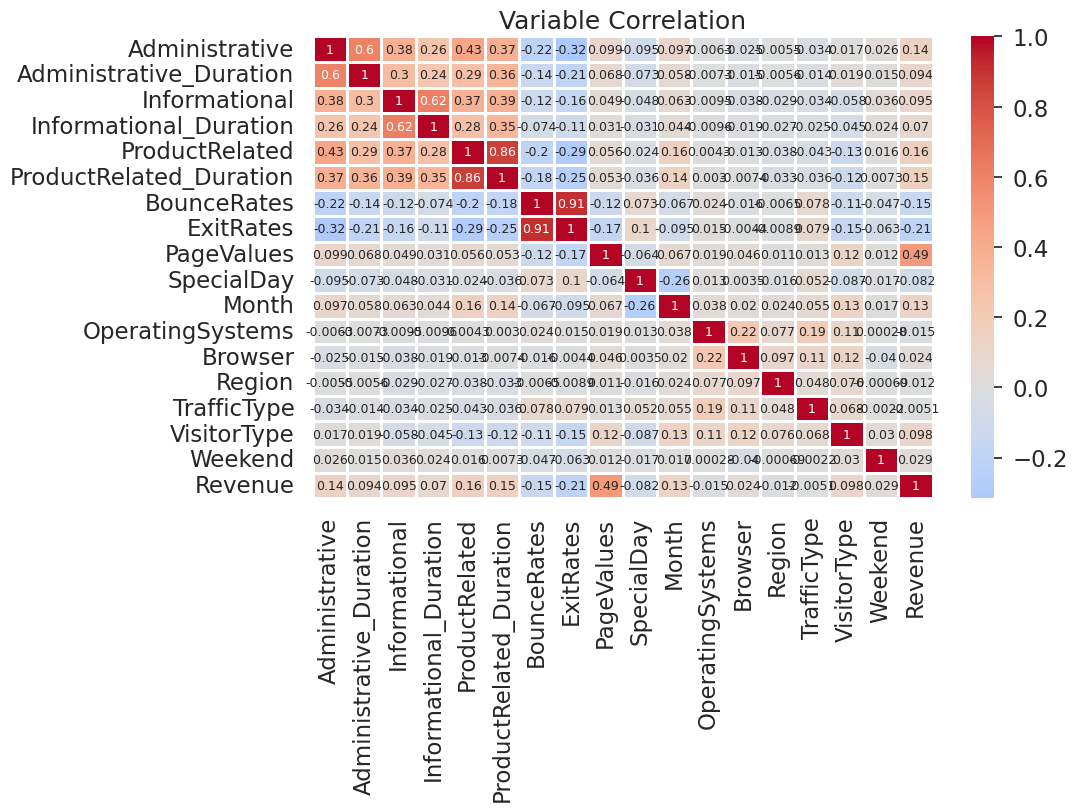

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dff.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [ ]:
sns.pairplot(dff)


**H20 AutoML Rexecution on new model**
Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

Dropping Operating System, Browser,Weekend and Traffic Type


In [ ]:
df1=df.drop(['OperatingSystems', 'Browser','Weekend','TrafficType'], axis=1)

In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])


In [ ]:
X1=df1.columns
print(X1)

In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Revenue'
X1.remove(y1_numeric)
print(X1)

In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)


In [165]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),1/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [166]:
print(aml1.leaderboard)


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_2_20240220_44248     0.931252   0.225034  0.744336                0.164343  0.26233   0.068817
StackedEnsemble_AllModels_2_AutoML_2_20240220_44248     0.931204   0.224837  0.745891                0.179542  0.262131  0.0687129
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_44248  0.930803   0.225137  0.744576                0.165     0.262232  0.0687656
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_44248  0.930452   0.226795  0.741334                0.173467  0.262853  0.0690919
GBM_1_AutoML_2_20240220_44248                           0.930351   0.226716  0.742587                0.174272  0.262727  0.0690255
GBM_grid_1_AutoML_2_20240220_44248_model_2              0.930192   0.228091  0.741237                0.179275  0.26354   0.0694533
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_44248  0.930094   0.226274  0.74159

In [167]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_1_AutoML_2_20240220_44248': 0,
 'StackedEnsemble_AllModels_2_AutoML_2_20240220_44248': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_44248': 2,
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_44248': 3,
 'GBM_1_AutoML_2_20240220_44248': 4,
 'GLM_1_AutoML_2_20240220_44248': 22}

In [168]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

4


In [169]:
best_model1.algo


'gbm'

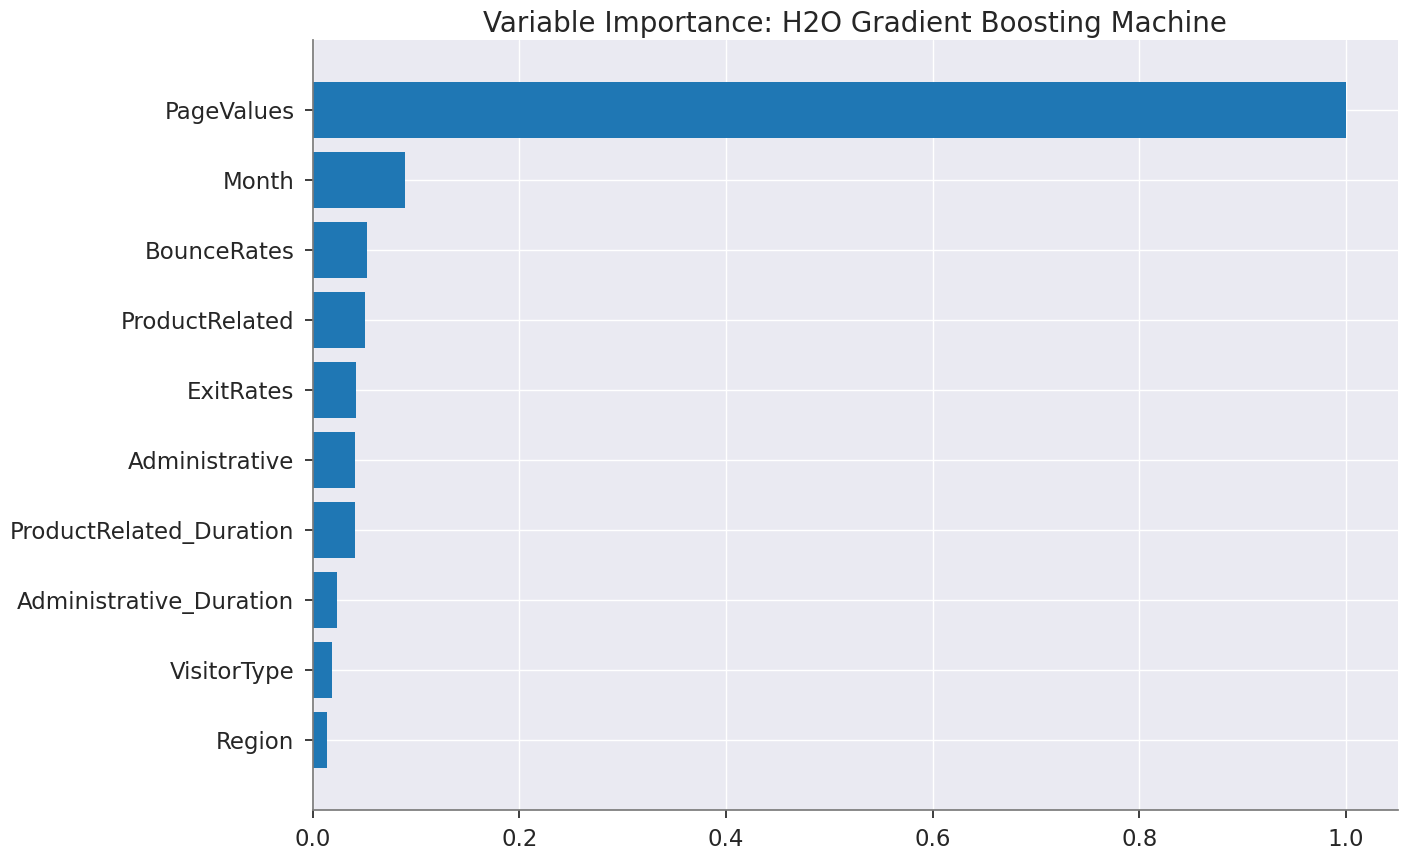

<Figure size 800x550 with 0 Axes>

In [170]:
#plot variables in order of their importance for Revenue prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

22
glm


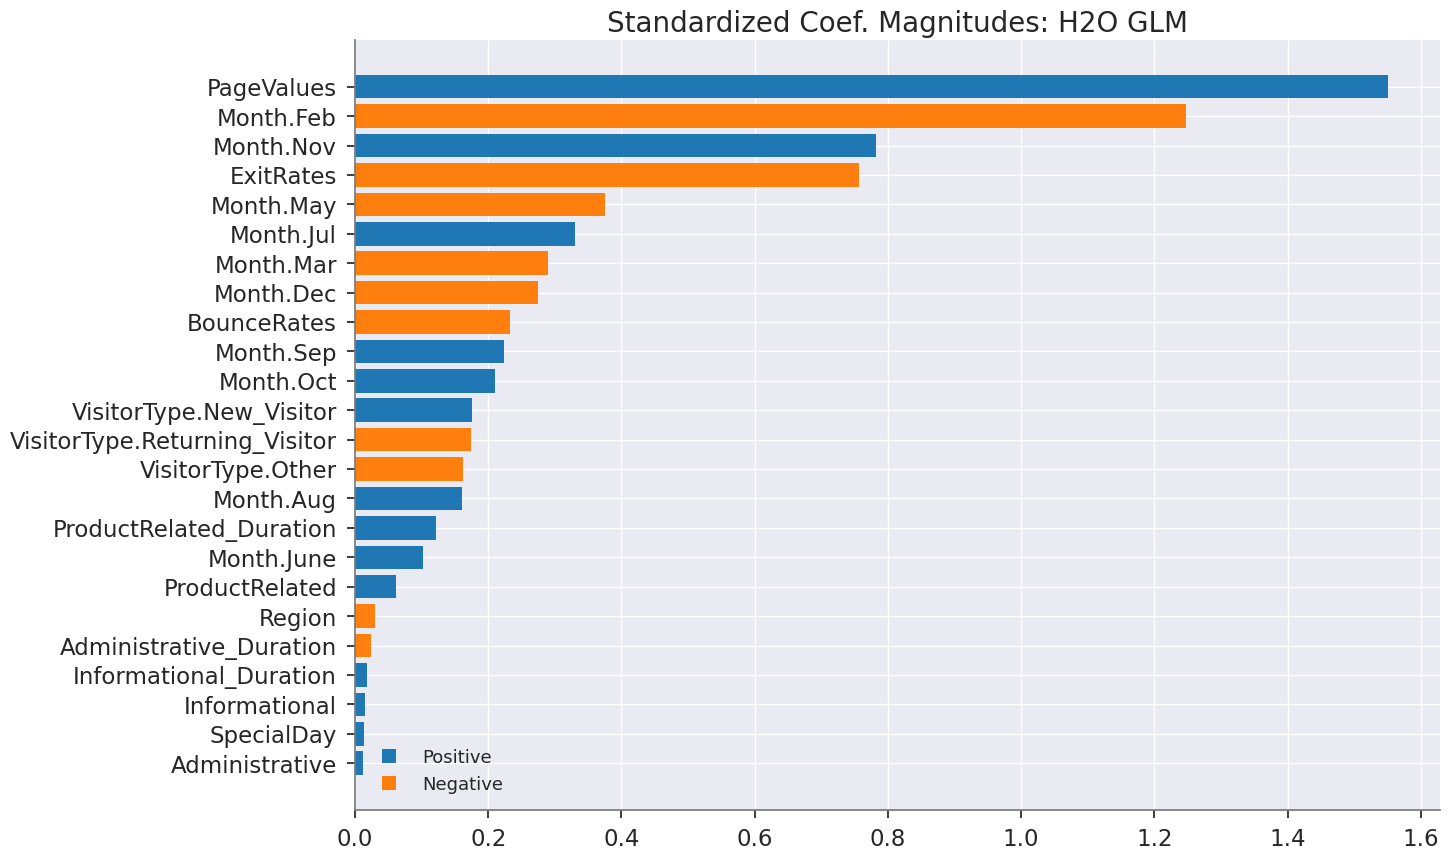

In [171]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

**Checking if assumptions violated**

In [172]:
df.head()


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.66667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.217,0.0157895,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,0,0,0,0,0,0.2,0.2,0,0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,2,37,0,0.1,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,738,0,0.0222222,0,0.4,Feb,2,4,1,2,Returning_Visitor,FALSE,FALSE


In [173]:
dff.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [174]:
#Seperating the predictor and target variables
A=dff.drop(['Revenue'],axis=1)
B=dff['Revenue']

In [175]:
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)


In [176]:
# Assuming A is your feature set and B is your target variable, both in an H2O Frame
split_frames = train_test_split(A,test_size=0.2,random_state=42) # Splits A into two frames with 80% of the data in the first frame
A_train = split_frames[0]
A_test = split_frames[1]

split_frames_b = train_test_split(B,test_size=0.2,random_state=42)  # Do the same for B if it's a separate frame
b_train = split_frames_b[0]
b_test = split_frames_b[1]



In [177]:
model1 = sm.OLS(b_train,sm.add_constant(A_train[X])).fit()

In [178]:
b_pred = model1.predict(sm.add_constant(A_train[X]))


In [179]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.8746831608025757e-16


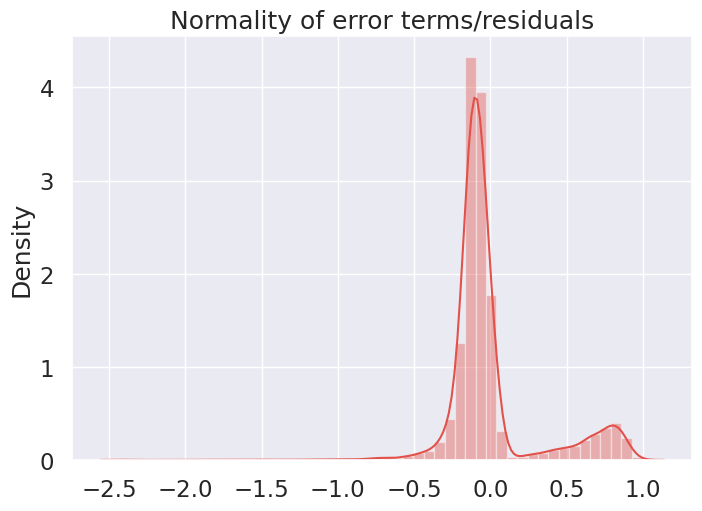

In [180]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


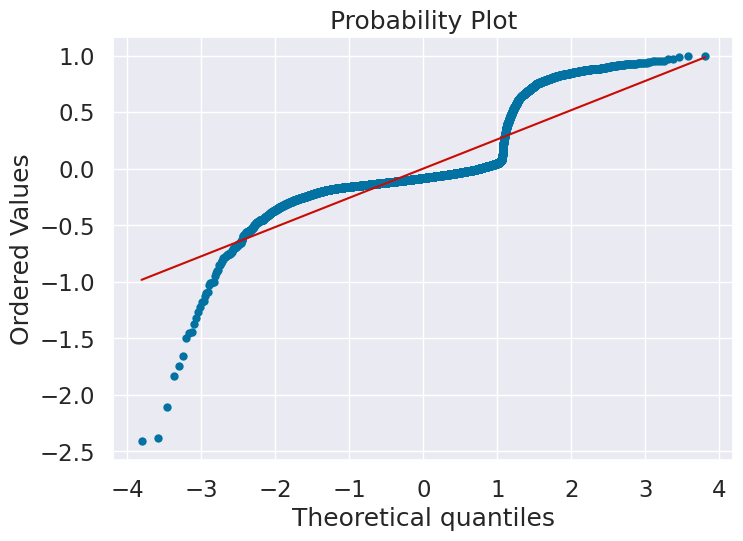

In [181]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Revenue', ylabel='Count'>

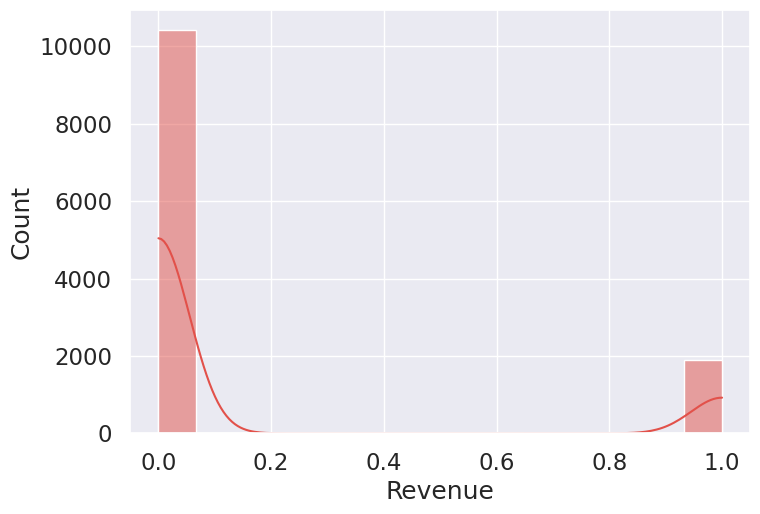

In [182]:
sns.histplot(dff.Revenue, kde = True)


Ridge Regularization in H20



In [183]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)


In [184]:
df1_train.types["Revenue"]

'enum'

In [185]:
df1_train["Revenue"] = df1_train["Revenue"].asnumeric()

In [186]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708403655227_3847


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  24                            24                             1                       py_549_sid_85a6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.09298713751232396
RMSE: 0.30493792403098036
MAE: 0.19713202464995302
RMSLE: 0.2073914301918962
Mean Residual Deviance: 0.09298713751232396
R^2: 0.2846003130626015
Null degrees of freedom: 9943
Residual degrees of freedom: 9919
Null deviance: 1292.513978278339
Residual deviance: 924.6640954225495
AIC: 4651.925000938678

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  -------------------  ------------------
    2024-02-20 04:46:45  0.000 sec   0             1292.513978278339          0.1299792818059472
    2024-02-20 04:46:45  0.173 sec   1                                                            0.30493792403098036  0.09298713751232396  0.19713202464995302  0.2846003130626015

Variable Importances: 
variable                       relative_importance    scaled_importance     percentage
-----------------------------  ---------------------  --------------------  ---------------------
PageValues                     0.16553659737110138    1.0                   0.26024649018210255
Month.Nov                      0.0754261463880539     0.4556463500271357    0.11858036335884785
ExitRates                      0.05156704783439636    0.31151448473229704   0.08107055129246649
Month.Feb                      0.04950137063860893    0.29903581096110327   0.07782302024138583
VisitorType.New_Visitor        0.04028906673192978    0.24338464950810484   0.06334000079868549
VisitorType.Other              0.032061878591775894   0.1936845332147265    0.050405719971691444
Month.Dec                      0.029957182705402374   0.18097014908578857   0.047096846127308314
Month.May                      0.026716554537415504   0.1613936432287665    0.04200212918798895
Month.Mar                      0.02563481591641903    0.15485890324875215   0.04030148604393755
BounceRates                    0.023474181070923805   0.1418065940929013    0.03690466839735564
---                            ---                    ---                   ---
VisitorType.Returning_Visitor  0.008227188140153885   0.04970011629337834   0.01293428082699404
Month.Aug                      0.006774755194783211   0.04092602664530735   0.010650854791540449
ProductRelated                 0.006180378142744303   0.037335418517085245  0.009716411628551315
Administrative                 0.005604438949376345   0.03385619275967274   0.008810955336633544
Region                         0.004739857278764248   0.02863328927885593   0.007451713037191082
Informational_Duration         0.0029972579795867205  0.018106316229682076  0.004712105248902001
Administrative_Duration        0.002816002583131194   0.01701135958967584   0.0044271466264387905
Month.June                     0.002120968187227845   0.012812684451118928  0.0033344561582145005
SpecialDay                     0.0018929563229903579  0.011435273849121786  0.002975989883505127
Informational                  0.0015891983639448881  0.009600284101419635  0.002498440242145501
[24 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/of

In [187]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)



glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708403655227_3848


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              22                            22                             1                       py_549_sid_85a6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.09298668847943845
RMSE: 0.3049371877607558
MAE: 0.1971274704551497
RMSLE: 0.20739773315052426
Mean Residual Deviance: 0.09298668847943845
R^2: 0.2846037677122908
Null degrees of freedom: 9943
Residual degrees of freedom: 9921
Null deviance: 1292.513978278339
Residual deviance: 924.6596302395359
AIC: 4647.876981460778

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-02-20 04:46:45  0.000 sec   0             1292.513978278339          0.1299792818059472
    2024-02-20 04:46:45  0.210 sec   1                                                            0.3049371877607558  0.09298668847943845  0.1971274704551497  0.2846037677122908

Variable Importances: 
variable                       relative_importance    scaled_importance     percentage
-----------------------------  ---------------------  --------------------  ---------------------
PageValues                     0.16570544242858887    1.0                   0.2408881528003508
VisitorType.Other              0.077288419008255      0.4664205223166561    0.11235517804903408
Month.Nov                      0.06879065185785294    0.4151381562950078    0.10000186362684775
Month.Feb                      0.05990944802761078    0.36154182475587      0.08709114232550966
ExitRates                      0.05191980302333832    0.3133258767026513    0.07547649166345215
VisitorType.Returning_Visitor  0.04864150658249855    0.2935419975928716    0.07071078956947185
Month.Dec                      0.0370091013610363     0.22334270268150944   0.05380061109038676
Month.May                      0.03394096717238426    0.2048271117408301    0.04934042459067961
Month.Mar                      0.03279086947441101    0.19788649662814972   0.04766851263688784
BounceRates                    0.023860450834035873   0.14399316331639855   0.03468624712716648
---                            ---                    ---                   ---
Month.Oct                      0.009924164041876793   0.05989039283458438   0.014426886100410397
Month.June                     0.009155681356787682   0.0552527498348966    0.01330973284486813
Month.Sep                      0.006688306573778391   0.04036262464137671   0.009722878092035158
ProductRelated                 0.00600136024877429    0.03621703765922227   0.008724255301630793
Administrative                 0.0055643911473453045  0.03358001442676387   0.00808902764627228
Region                         0.004707461688667536   0.028408612412934034  0.006843298167772797
Informational_Duration         0.0029929610900580883  0.018061935964160693  0.004350906390404892
Administrative_Duration        0.0028441937174648046  0.01716415390937154   0.0041346413296094306
SpecialDay                     0.0017686295323073864  0.01067333399788351   0.0025710797109713425
Informational                  0.0015831348719075322  0.009553909930205145  0.002301423715108046
[22 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

DATA REPORT

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_44248,0.940212,0.217507,0.773094,0.155713,0.25864,0.0668948,1941,0.170347,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_44248,0.939954,0.219176,0.769658,0.155885,0.260346,0.0677802,2176,0.024981,StackedEnsemble
GBM_1_AutoML_2_20240220_44248,0.939728,0.21966,0.76872,0.161081,0.26015,0.0676779,1752,0.01924,GBM
StackedEnsemble_AllModels_2_AutoML_2_20240220_44248,0.939573,0.218724,0.770312,0.159834,0.259658,0.0674224,3589,0.1682,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240220_44248,0.93945,0.219379,0.768061,0.166277,0.260305,0.0677587,4172,0.122366,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_44248,0.939448,0.219,0.770459,0.152696,0.260196,0.067702,3088,0.087791,StackedEnsemble
XGBoost_3_AutoML_2_20240220_44248,0.937917,0.220767,0.768712,0.142499,0.259566,0.0673745,3657,0.010077,XGBoost
GBM_2_AutoML_2_20240220_44248,0.937765,0.224364,0.756439,0.156449,0.262842,0.0690862,1243,0.027685,GBM
GBM_grid_1_AutoML_2_20240220_44248_model_2,0.936556,0.224363,0.759477,0.176723,0.261207,0.0682291,1326,0.017948,GBM
XGBoost_grid_1_AutoML_2_20240220_44248_model_3,0.936227,0.224287,0.75799,0.161947,0.263165,0.0692559,1312,0.011667,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20240220_44248

,FALSE,TRUE,Error,Rate
FALSE,1875.0,130.0,0.0648,(130.0/2005.0)
TRUE,102.0,279.0,0.2677,(102.0/381.0)
Total,1977.0,409.0,0.0972,(232.0/2386.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

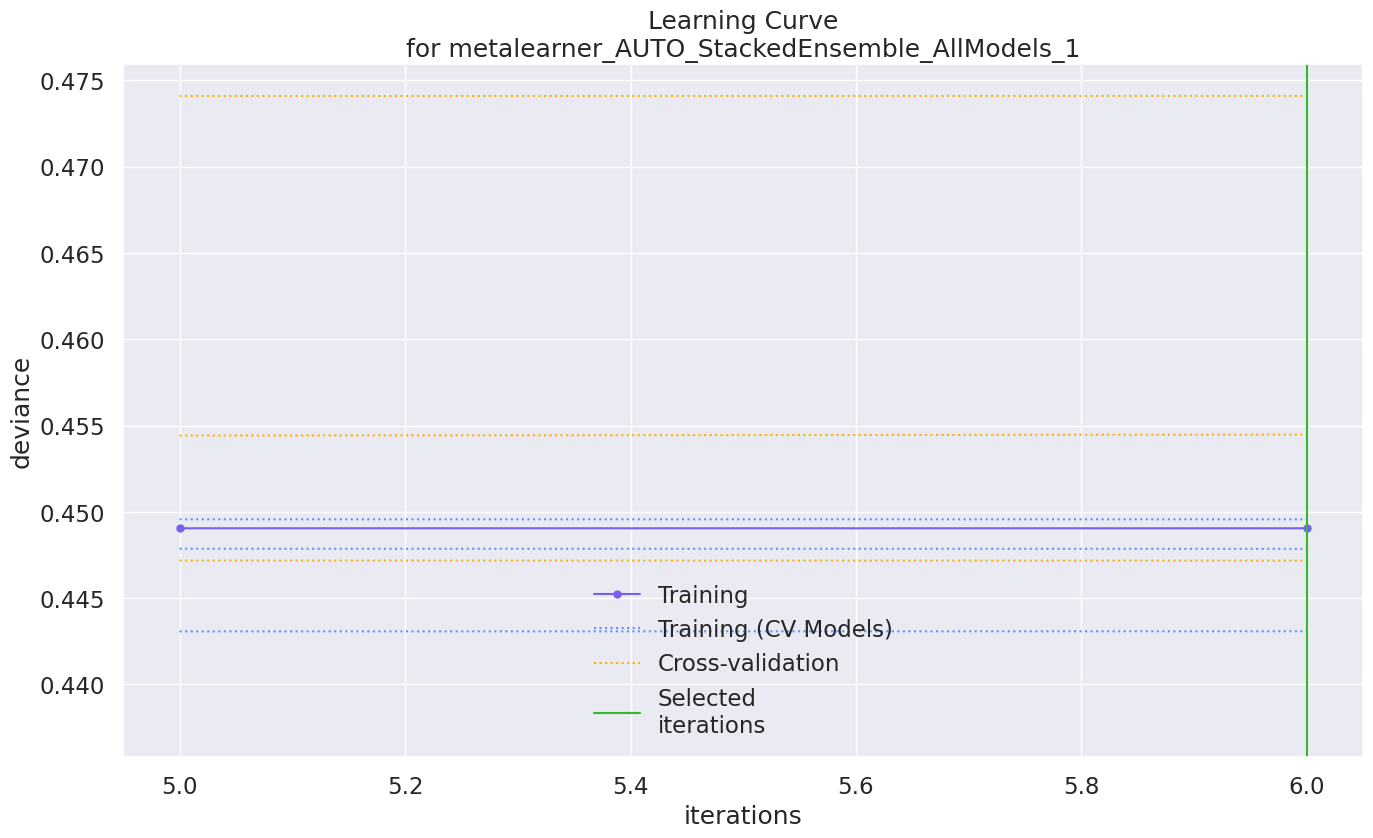

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

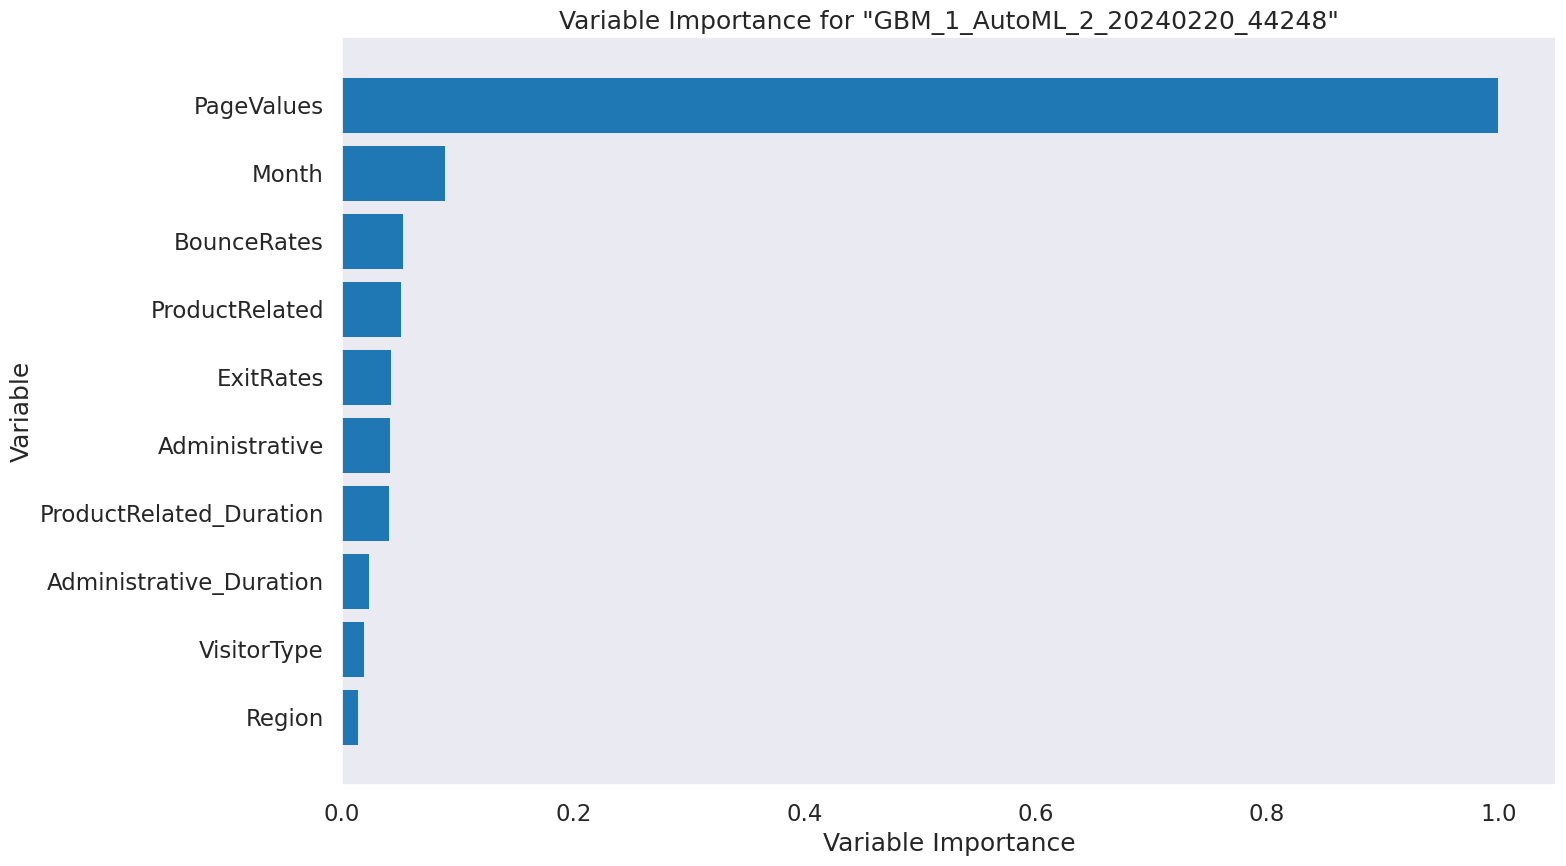

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

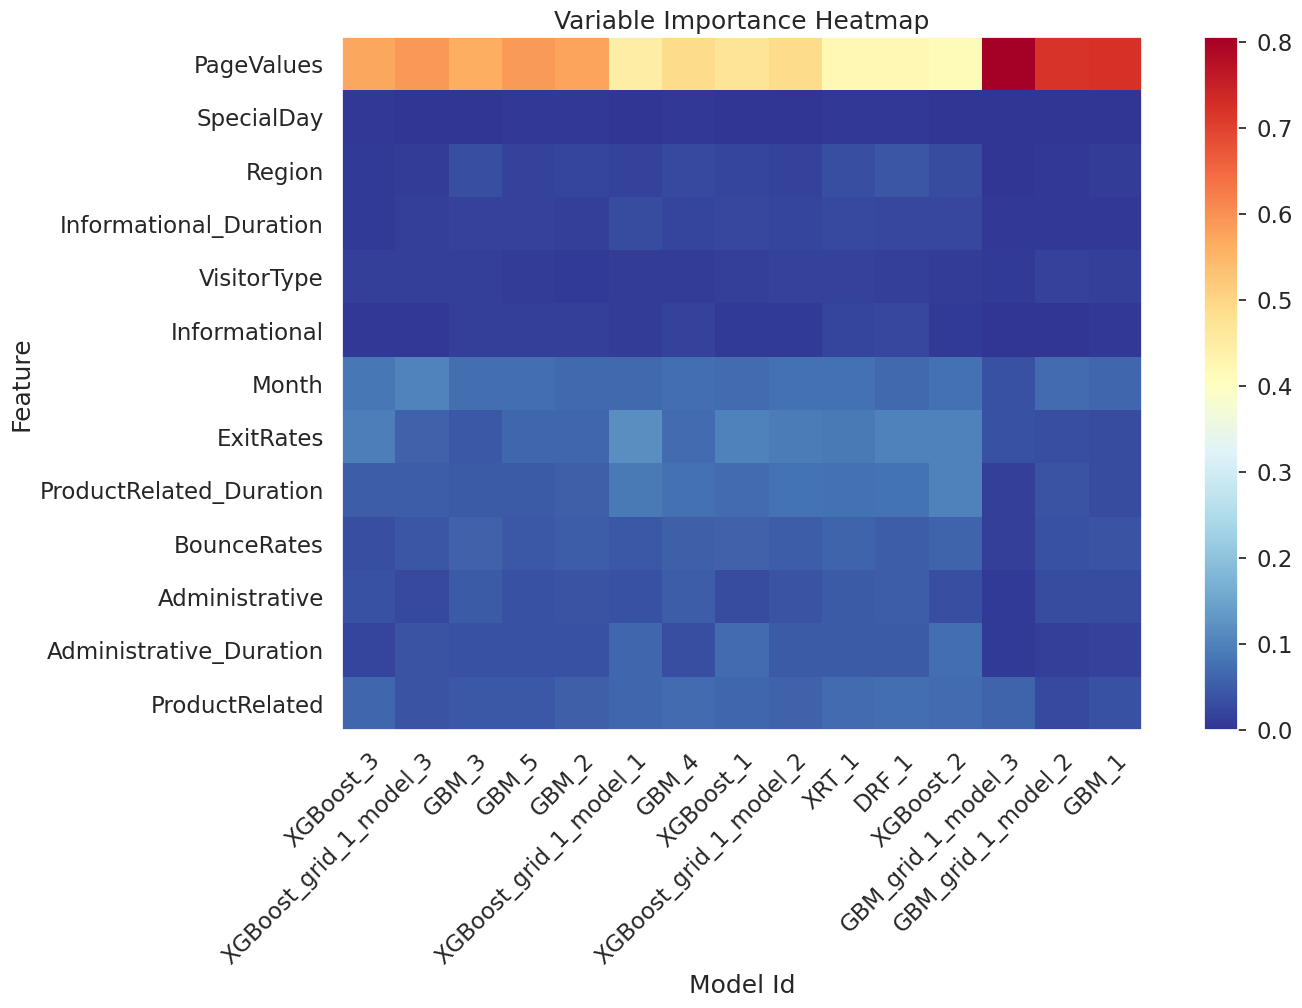

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

In [ ]:
exa = aml1.explain(df1_test)


Hyperparameter Tuning


In [ ]:
s = dff['Revenue']

t = dff.drop(['Revenue'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 42, test_size = 0.2)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_


**CONCLUSION**:

AutoML was utilized for revenue prediction, taking into account various factors such as Variance Inflation Factor (VIF), p-values, and additional tests to exclude certain independent variables. The H2O.ai framework facilitated the training and testing of dataset variables related to the online consumer purchase intent analysis, identifying 'gbm' as the optimal model. The findings indicate that the suggested linear regression approach is capable of assessing and forecasting housing prices to a certain degree. However, it's acknowledged that the model's predictive precision has limitations at specific junctures, necessitating further enhancements through ongoing research. Future studies on these models may benefit from implementing strategies such as outlier removal and the application of ensemble or boosting techniques to improve prediction accuracy.



1) Is the relationship significant?
Ans: A relationship is considered to be statistically significant if the p-value associated with the variables is below 0.05. The p-value represents the likelihood of observing a result as extreme as, or more so, than the one observed, under the assumption that the null hypothesis holds true. A low p-value indicates a substantial difference between the two compared groups, suggesting the null hypothesis can be rejected. In this model, the p-value was determined through two methods. Using the OLS (Ordinary Least Squares) approach, it was found that the p-values for variables such as 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'Browser', 'TrafficType', and 'Weekend' exceeded 0.05. This observation leads to the conclusion that the p-values for the remaining variables in the dataset are below 0.05, thereby affirming the significance of the relationship for the dataset under consideration.

2) Are any model assumptions violated?
Ans:
- Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

- Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.


3)Is there any multicollinearity in the model?
Ans: Multicollinearity occurs in a model when there is a high correlation between two or more independent variables. This condition is problematic because it diminishes the reliability of the statistical significance of individual independent variables. To identify multicollinearity, one can utilize a correlation matrix or compute the Variance Inflation Factor (VIF) for each variable. In a correlation matrix, a coefficient near +1 or -1 indicates a strong correlation between two variables. A VIF value exceeding 10 suggests the presence of multicollinearity. In the discussed model, although no variables exhibited a VIF greater than 10, certain variables had p-values higher than 0.05. Removing these variables and reassessing the model led to the desired results. Presently, there is a significant correlation observed between Bounce Rate and Exit Rate.

4) In the multivariate models are predictor variables independent of all the other predictor variables?
Ans: Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that ExitRates and BounceRates are correlated to each other. Other than those other predictors are independent from each other.

5) In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
Ans: From the variable importance plot, the most to least important variables are displayed. For my model PageValues, Month, Bouncerates, ProductRelated are top 4 most important variables to determine Revenue. VIF and p-values for OperatingSystems, Browser, Weekend, and TrafficType was higherrafficType was high than the ideal values. So those variables were excluded from the model.

6) Does the model make sense?
Ans: For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

7) Does regularization help?
Ans: Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

8)Which independent variables are significant?
Ans: Variables are significant when p-value is less than 0.05.'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'Browser', 'TrafficType', and 'Weekend' all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

9) Which hyperparameters are important?
Ans: To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 500}

LICENSE:
MIT License

Copyright (c) 2024 shwetackhade

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.